In [88]:
using SegyIO, Plots, DSP, DelimitedFiles

In [89]:
prestk_dir = "/home/data-volume/phys_model/"
prestk_file = "009_3D_georeshetka_float_fixed_scale.sgy"
dt = 2.5                # ms
dir_out = "$(@__DIR__)/../data/"

container = segy_scan(prestk_dir, prestk_file, ["SourceX", "SourceY", "GroupX", "GroupY", "RecGroupElevation", "SourceSurfaceElevation", "dt"])

# prepare folder for output data
mkpath(dir_out)

Scanning ... /home/data-volume/phys_model/009_3D_georeshetka_float.sgy


"/home/jovyan/work/phys_model_inversion/segy_work/../data"

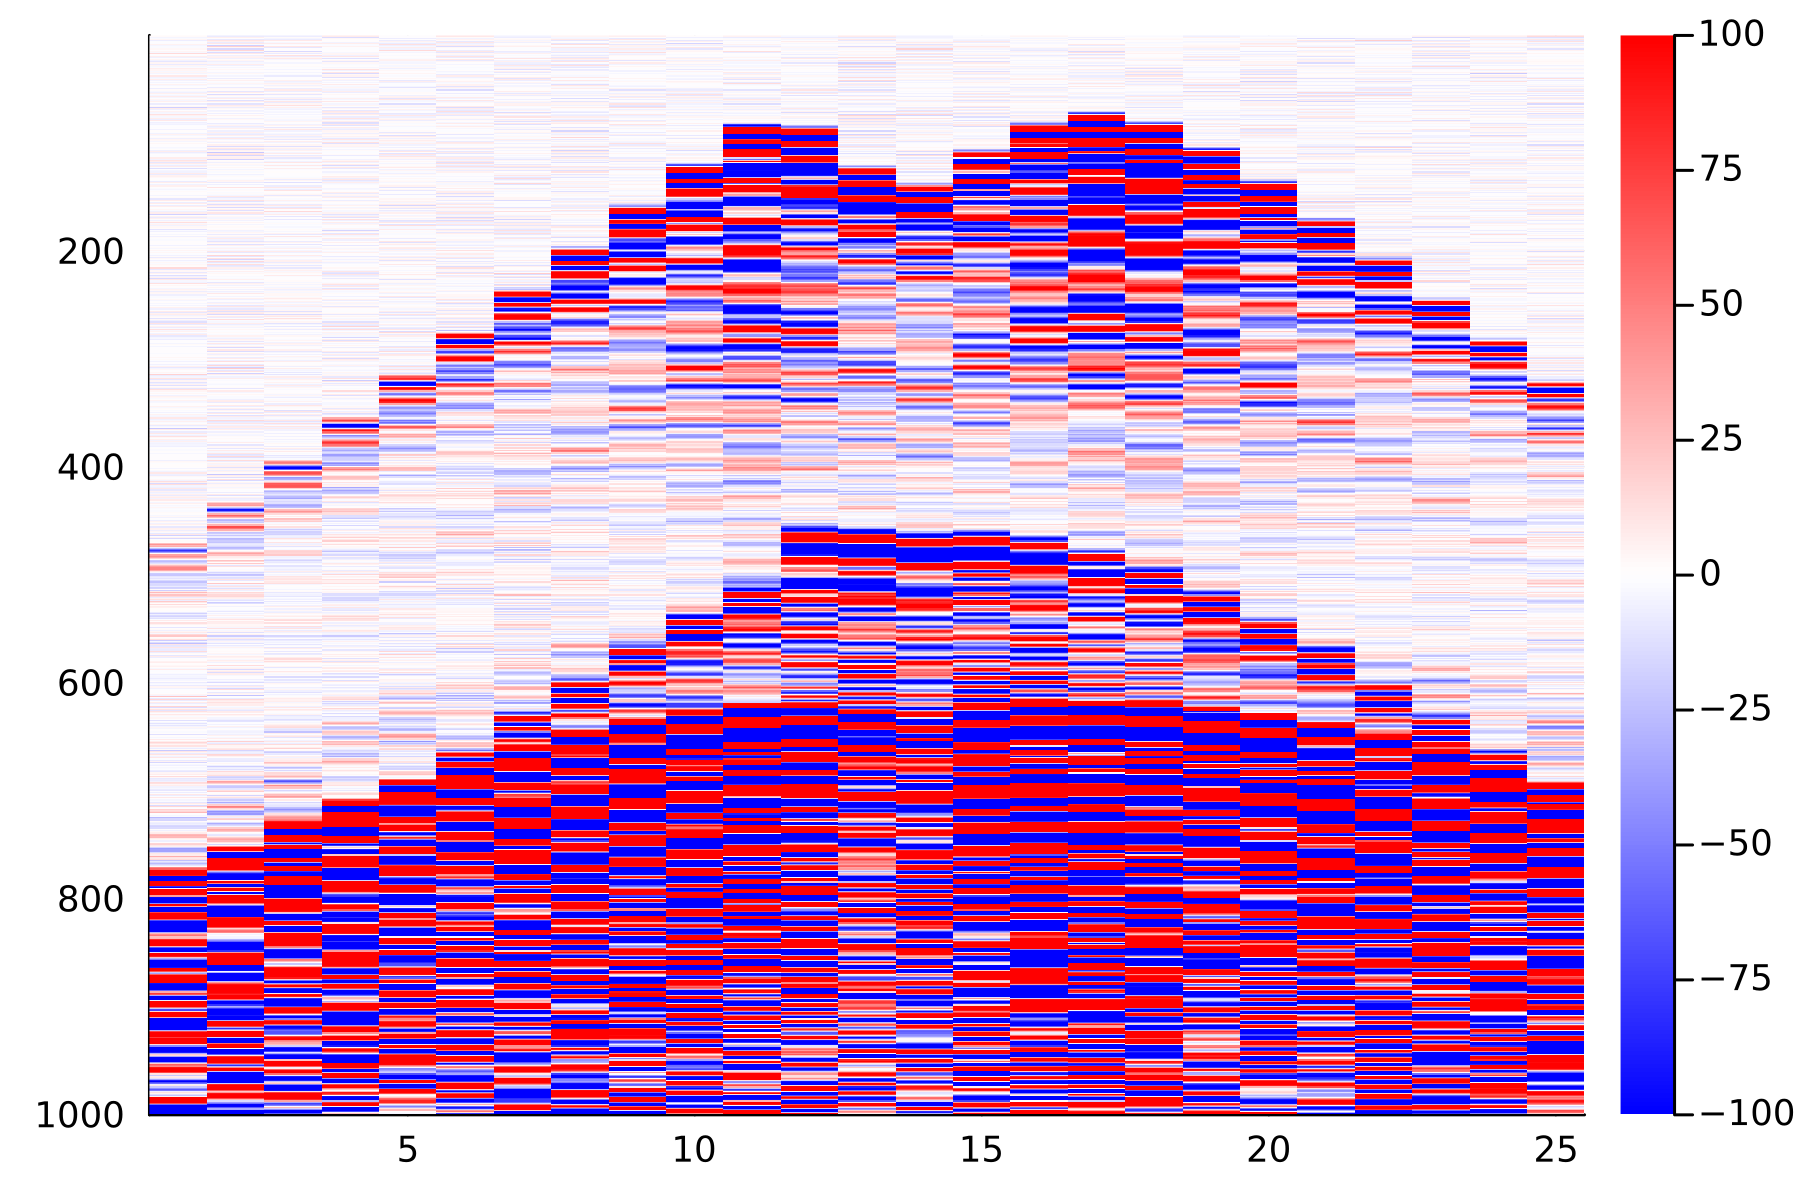

In [21]:
ns = 1000
trc0 = 1
trc1 = 25
cmap = :bwr

block = container[100]
clim = (-100, 100)

plt = Plots.heatmap(block.data[1:ns, trc0:trc1], c=cmap, clim=clim, yaxis = :flip, dpi=300)

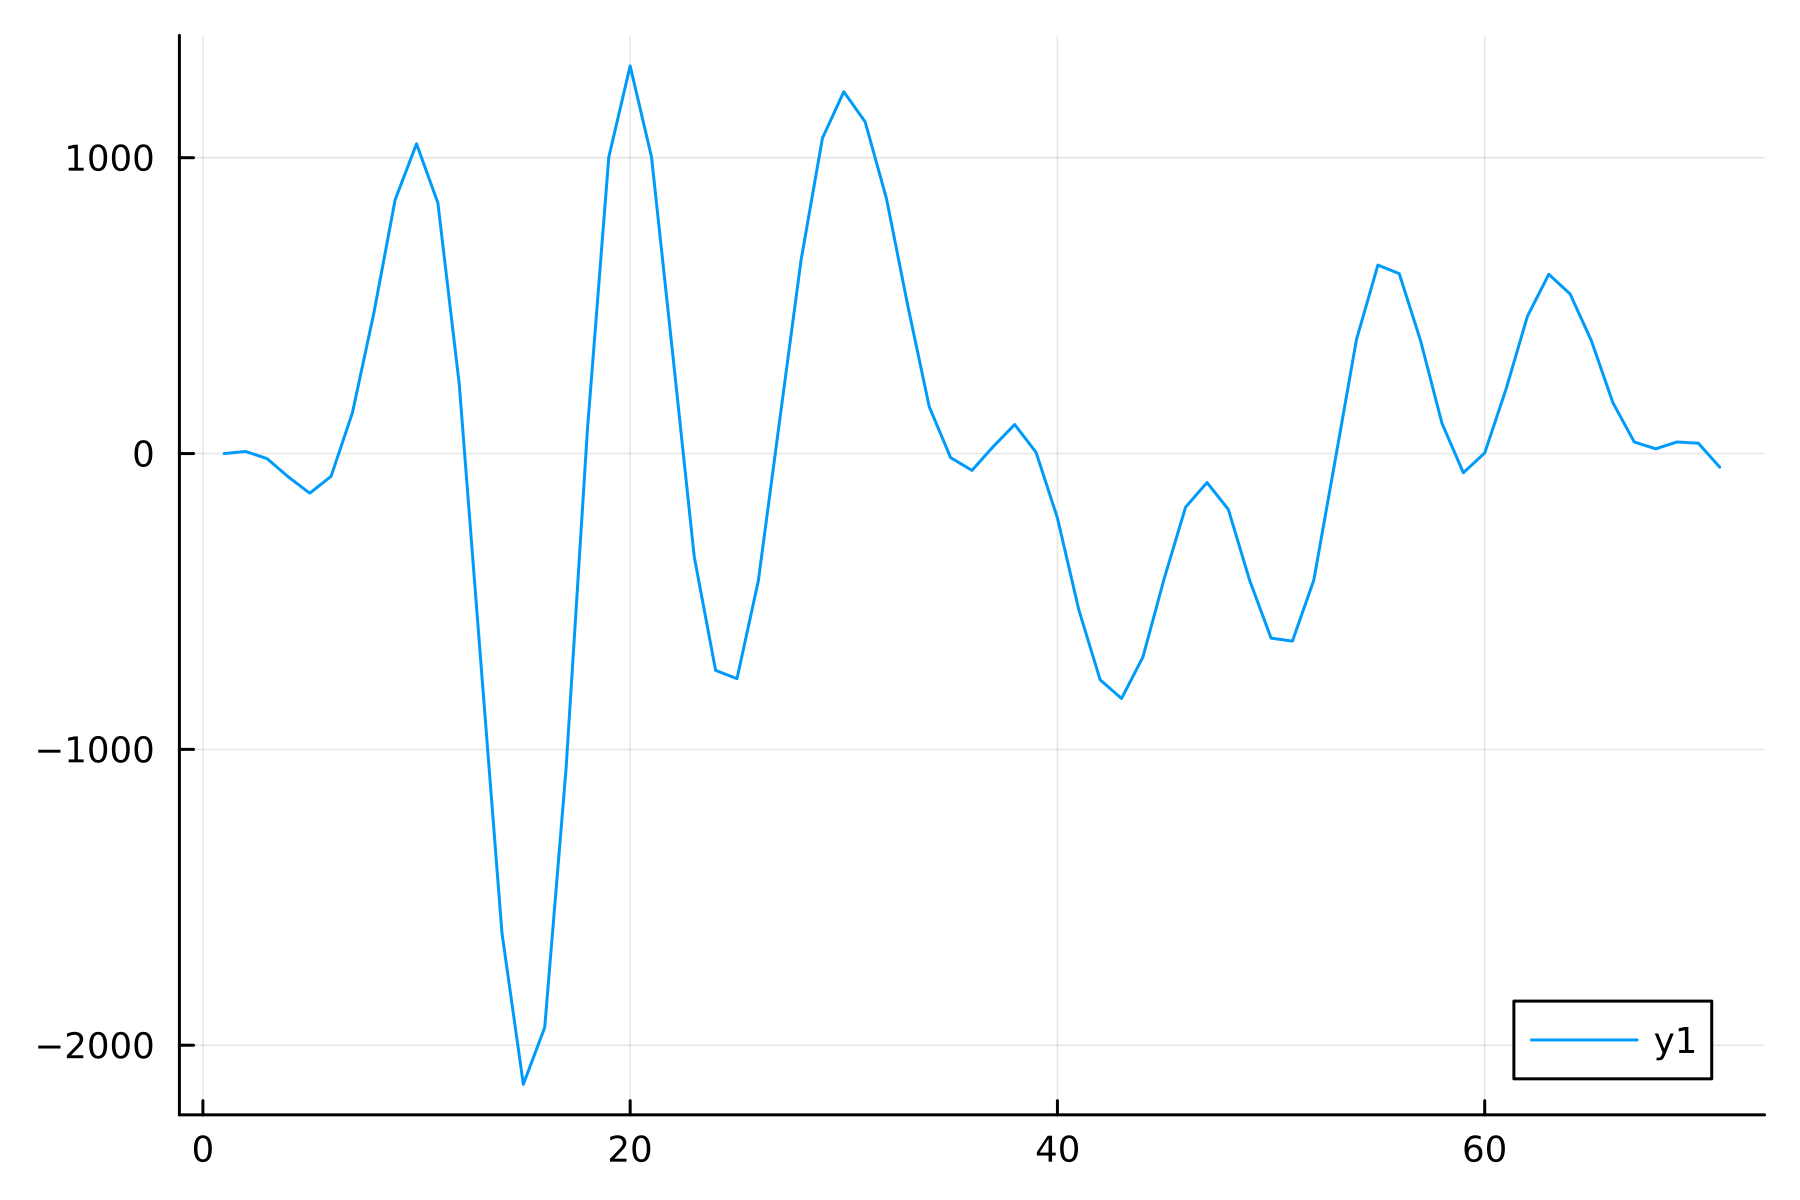

In [37]:
samp0 = 80
samp1 = 150
trc = 11

q = block.data[samp0:samp1, trc]

plt = Plots.plot(q, dpi=300)

In [73]:
length(q)-1

70

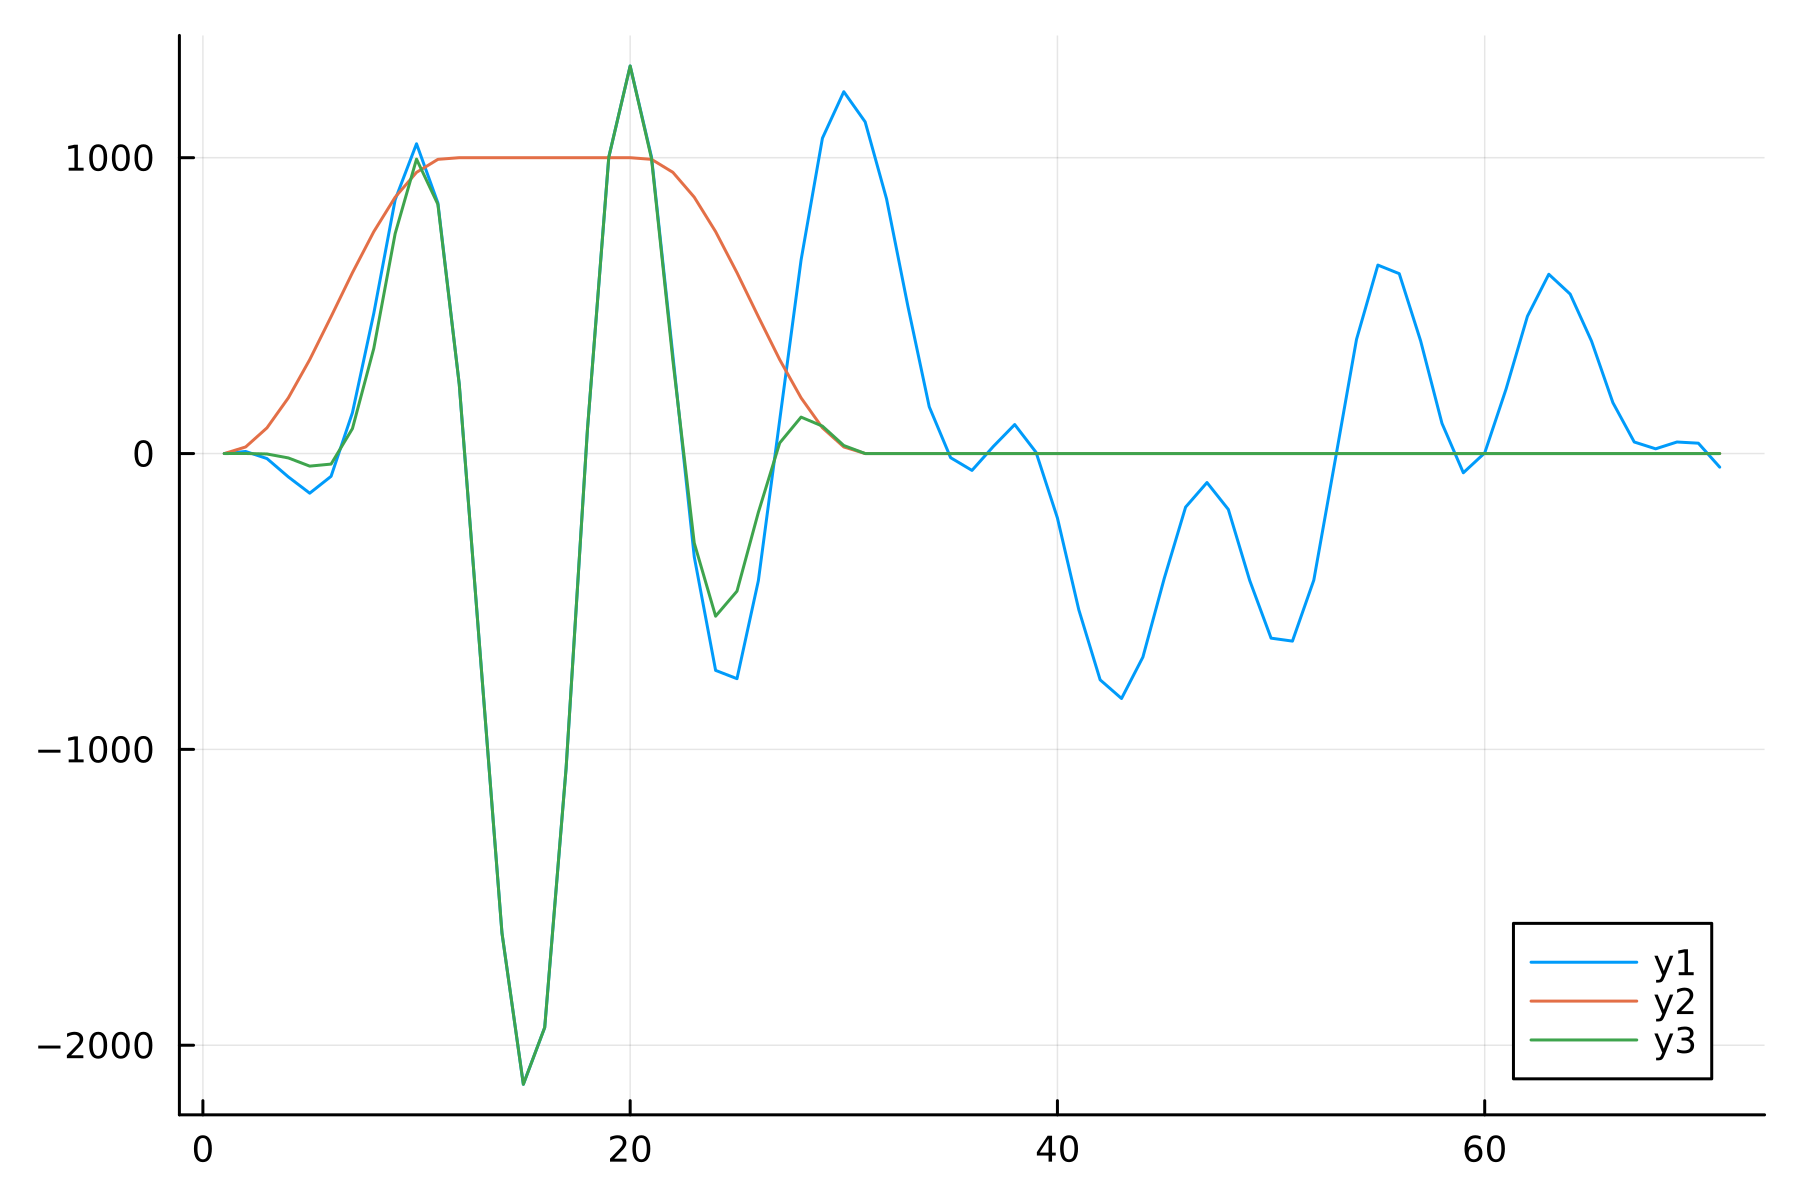

In [87]:
nw = 31

w = tukey((nw), 0.7; padding=(length(q)-nw), zerophase=false)
q_filt = q.*w

plt = Plots.plot(q, dpi=300)
plt = Plots.plot!(plt, w*1000, dpi=300)
plt = Plots.plot!(plt, q_filt, dpi=300)

# Plots.plot(
#     Plots.plot(q, dpi=300),
#     Plots.plot(w, dpi=300),
#     Plots.plot(q.*w, dpi=300);
#     layout=(3,1)
# )

In [ ]:
writedlm(dir_out * "source_signal.txt", q_filt, "\t")